<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%206/C6_Autoencoder_Linear_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [2]:
!wget https://storage.googleapis.com/nicksdemobucket/anonymized_data.csv

--2019-04-13 14:17:01--  https://storage.googleapis.com/nicksdemobucket/anonymized_data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284033 (277K) [application/octet-stream]
Saving to: ‘anonymized_data.csv’

anonymized_data.csv 100%[===================>] 277.38K  --.-KB/s    in 0.003s  

2019-04-13 14:17:02 (96.2 MB/s) - ‘anonymized_data.csv’ saved [284033/284033]



In [3]:
df = pd.read_csv('anonymized_data.csv')
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [0]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [7]:
X.shape

(500, 30)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [38]:
model = Sequential()

model.add(Dense(30, activation="linear", input_shape=(30,)))
model.add(Dense(2, activation="linear", name='compressed'))
model.add(Dense(30, activation="linear"))

model.compile('adam', 'mse')

model.summary()

model.fit(X, X, epochs=200, batch_size=100, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
compressed (Dense)           (None, 2)                 62        
_________________________________________________________________
dense_11 (Dense)             (None, 30)                90        
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
500/500 [==============================] - 1s 1ms/sample - loss: 39.1648
Epoch 2/200
500/500 [==============================] - 0s 32us/sample - loss: 34.9198
Epoch 3/200
500/500 [==============================] - 0s 29us/sample - loss: 32.8205
Epoch 4/200
500/500 [==============================] - 0s 24us/sample - loss: 32.0001
Epoch 5/200
500/500 [==============================] - 0s 28u

In [0]:
model_compressed_output = Model(inputs=model.inputs, 
                                outputs=model.get_layer('compressed').output)

In [0]:
out_compressed = model_compressed_output.predict(X)

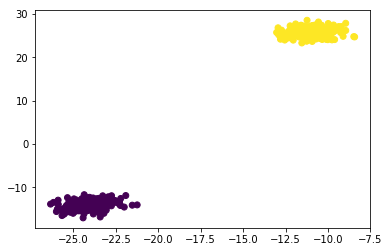

In [41]:
plt.scatter(out_compressed[:,0], out_compressed[:,1], c=y)